## OVER VIEW
## This python script's objective is to find out the features which impact the property price in Melb House Market.
## The data contains Property suburb, address, Room number, Property type, Price, Sale Method, Sale Aggency, Sold Date,
## Distance to the city center , Postcode , Bedroom2 (Bedroom number extract from other sources),Bathroom number,Car park
## Number , Landsize,BuildingArea,YearBuilt,CouncilArea and Location (Longtitute&Latitute),Regionname and PropertyCount in
## each suburb

## 1.the analysis will start with examine the whole data set and data cleanning will be conducted accordingly
## 2.the correlation will be implented to gain the overview concept of numerical features with house price
## 3.the nonnumerical features impact on house price will be tested.

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)
# turn off scientific display
pd.set_option('display.float_format',lambda x : '%.2f' % x)
sns.set_theme(style='darkgrid')


In [2]:
# Read data
df = pd.read_csv('melb_data.csv')
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,nan,nan,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,1.00,94.00,nan,nan,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
4,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,3.00,1.00,2.00,120.00,142.00,2014.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.00,S,Barry,26/08/2017,16.70,3150.00,4.00,2.00,2.00,652.00,nan,1981.00,NaN,-37.91,145.17,South-Eastern Metropolitan,7392.00
13576,Williamstown,77 Merrett Dr,3,h,1031000.00,SP,Williams,26/08/2017,6.80,3016.00,3.00,2.00,2.00,333.00,133.00,1995.00,NaN,-37.86,144.88,Western Metropolitan,6380.00
13577,Williamstown,83 Power St,3,h,1170000.00,S,Raine,26/08/2017,6.80,3016.00,3.00,2.00,4.00,436.00,nan,1997.00,NaN,-37.85,144.89,Western Metropolitan,6380.00
13578,Williamstown,96 Verdon St,4,h,2500000.00,PI,Sweeney,26/08/2017,6.80,3016.00,4.00,1.00,5.00,866.00,157.00,1920.00,NaN,-37.86,144.89,Western Metropolitan,6380.00


### Data quality check (Null value, Datatype)

In [3]:
# df overview
df.info()
# sum up null number in df
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

C:\Users\87636\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


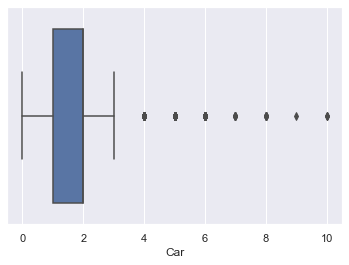

In [4]:
# fill car null
## check the car number distribution
sns.boxplot(df.Car)
plt.show()

In [5]:
## replace the Car null with median (median=2)
df['Car'] =df['Car'].fillna(df['Car'].median())



In [6]:
# check the type of property that building area = null
df[df['BuildingArea'].isnull()]['Type'].unique()


array(['h', 'u', 't'], dtype=object)

In [7]:
# check the year of the property ordered by year
# YearBuild = df['YearBuilt'].unique()
# sorted(YearBuild)

In [8]:
# transfer Col YearBuilt data type to int
df['YearBuilt'] = df['YearBuilt'].astype('Int64') # int64 can work with nan values , 'int'will throw an error about nan


## Check the prize distribution based on Property type

<Figure size 5760x3600 with 0 Axes>

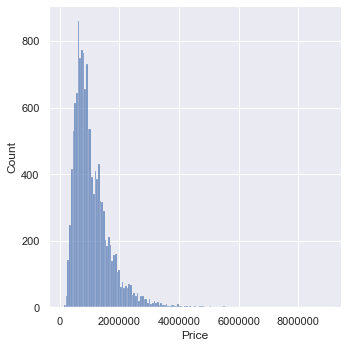

In [9]:
plt.figure(figsize=(80,50))
sns.displot(df.Price)
plt.ticklabel_format(style='plain') # shut down scientific counting method
plt.show() # 0-2000K

In [33]:
Price = df.groupby('Type').Price.describe().reset_index()

,Type,count,mean,std,min,25%,50%,75%,max
0,h,9449.00,1242664.76,668078.74,131000.00,792000.00,1080000.00,1500000.00,9000000.00
1,t,1114.00,933735.05,395038.25,300000.00,670000.00,846750.00,1101900.00,3475000.00
2,u,3017.00,605127.48,260987.45,85000.00,440000.00,560000.00,706000.00,3625000.00


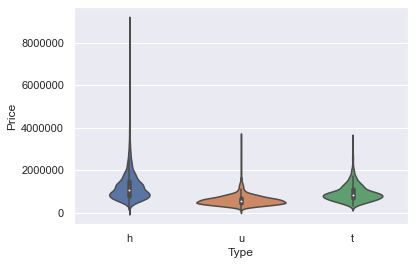

In [54]:
fig,ax = plt.subplots()
sns.violinplot(x='Type',y='Price',data=df)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

## Output:main house price is between 792000-1500000, townhouse price is between 670000-1101900,unit price is between 440000-706000

## Check the numerical features corr based in different property type

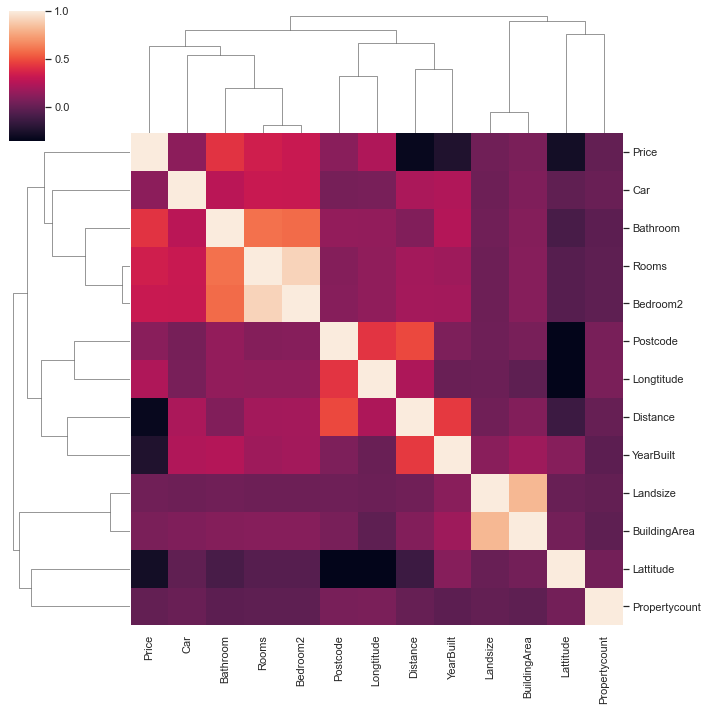

In [65]:
housecorrdf = df[df['Type']=='h']
sns.clustermap(pd.DataFrame.corr(housecorrdf))
plt.show()

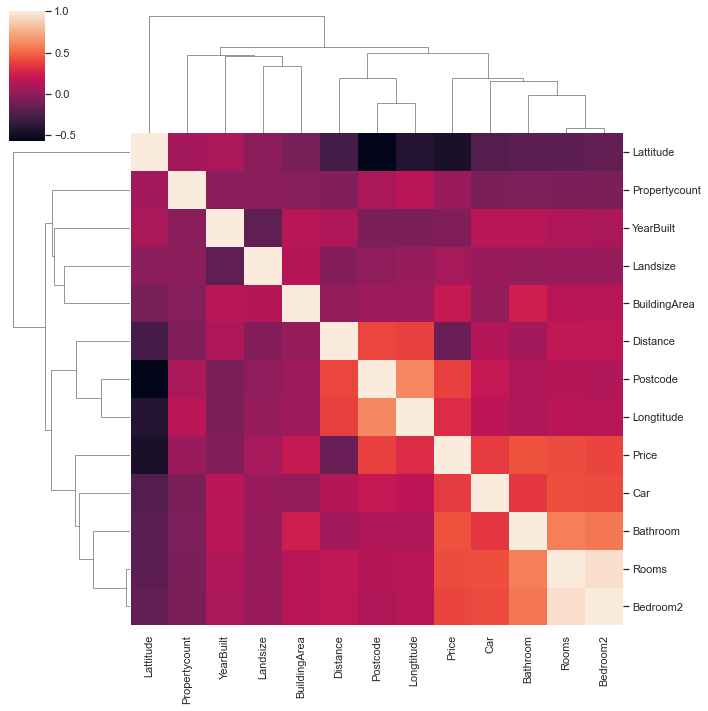

In [66]:
townhousecorrdf = df[df['Type']=='t']
sns.clustermap(pd.DataFrame.corr(townhousecorrdf))
plt.show()

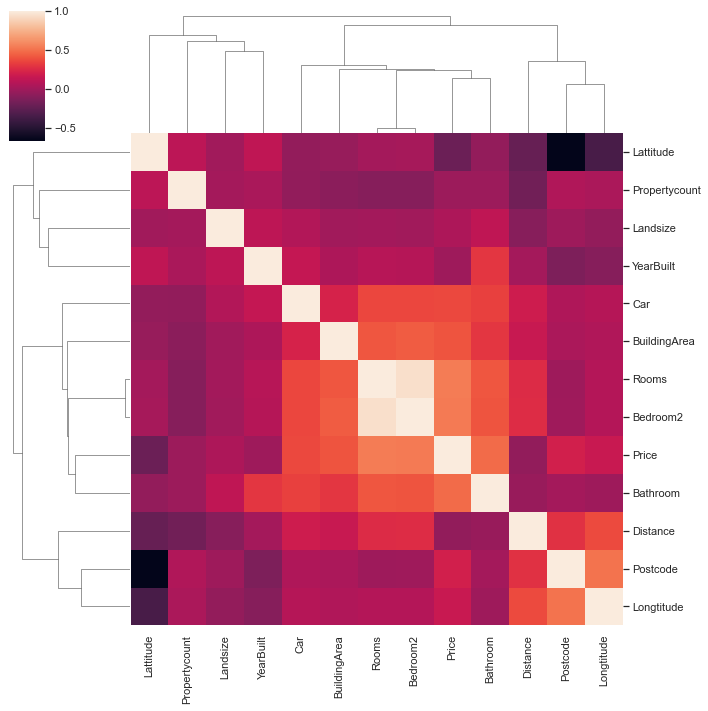

In [67]:
unitcorrdf = df[df['Type']=='u']
sns.clustermap(pd.DataFrame.corr(unitcorrdf))
plt.show()


## Output:Feature Rooms and Bedroom2 have high corr with house price and Rooms and Bedroom2 has high corr too.

# (Categorical Feature) Does Property type impact the house price?
## What type of the properties do Mel real estate have ? Which one shares the biggest proportion?

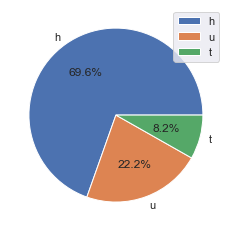

In [13]:
# Check the proportion in each type of sold property
plt.pie(df.Type.value_counts(),labels=df.Type.value_counts().index,autopct='%1.1f%%')
plt.legend()
plt.show()

## Output: House owns the biggeest market which is 69.6% followed by units 22.2% and townhouse 8.2%

## How property type impact house prize ?

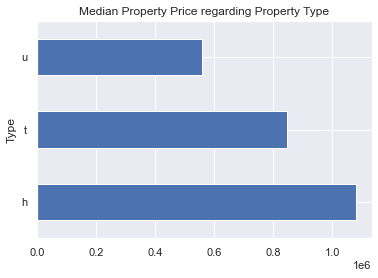

In [14]:
# Discover the property average price regarding property type
ax=plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
df.groupby('Type').Price.agg('median').plot.barh()
plt.title('Median Property Price regarding Property Type')
plt.show()

## Output :According to the calculation of the mean price of each type of propreties, house is the most pricy one and unit is the cheapest one.

# Will Region Impact the house price?

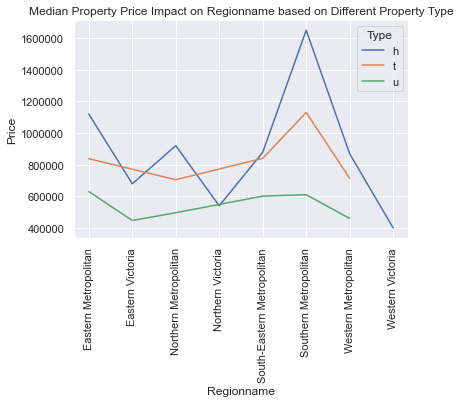

In [15]:
# Region with price
# Median price of each region
fig,ax = plt.subplots()
Region = df.groupby(['Regionname','Type']).Price.agg('median')
Region = Region.reset_index()
sns.lineplot(x=Region.Regionname,y=Region.Price,hue=Region.Type)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation=90)
plt.title('Median Property Price Impact on Regionname based on Different Property Type')
plt.show()

## Southern Metroplian has the highest price in both type of property so region does impact house price


# Will number of sold property impact the house price in different type property?

In [90]:
# Calculate the number of sold property and median price based on property type
PSd = df.groupby(['Type','Regionname','Suburb'])[['Suburb','Price']].agg({'Suburb':'count','Price':'median'}).rename(columns={'Suburb':'SoldCountBySuburb'}).reset_index()
PSd = PSd.sort_values(by='SoldCountBySuburb',ascending=False)
PSd

,Type,Regionname,Suburb,SoldCountBySuburb,Price
116,h,Northern Metropolitan,Reservoir,253,785000.00
114,h,Northern Metropolitan,Preston,208,929000.00
188,h,Southern Metropolitan,Bentleigh East,168,1189500.00
74,h,Northern Metropolitan,Brunswick,159,1105000.00
117,h,Northern Metropolitan,Richmond,152,1275000.00
...,...,...,...,...,...
408,t,Southern Metropolitan,Black Rock,1,1215000.00
415,t,Southern Metropolitan,Caulfield,1,1600000.00
419,t,Southern Metropolitan,Deepdene,1,1680000.00
420,t,Southern Metropolitan,Docklands,1,1370000.00


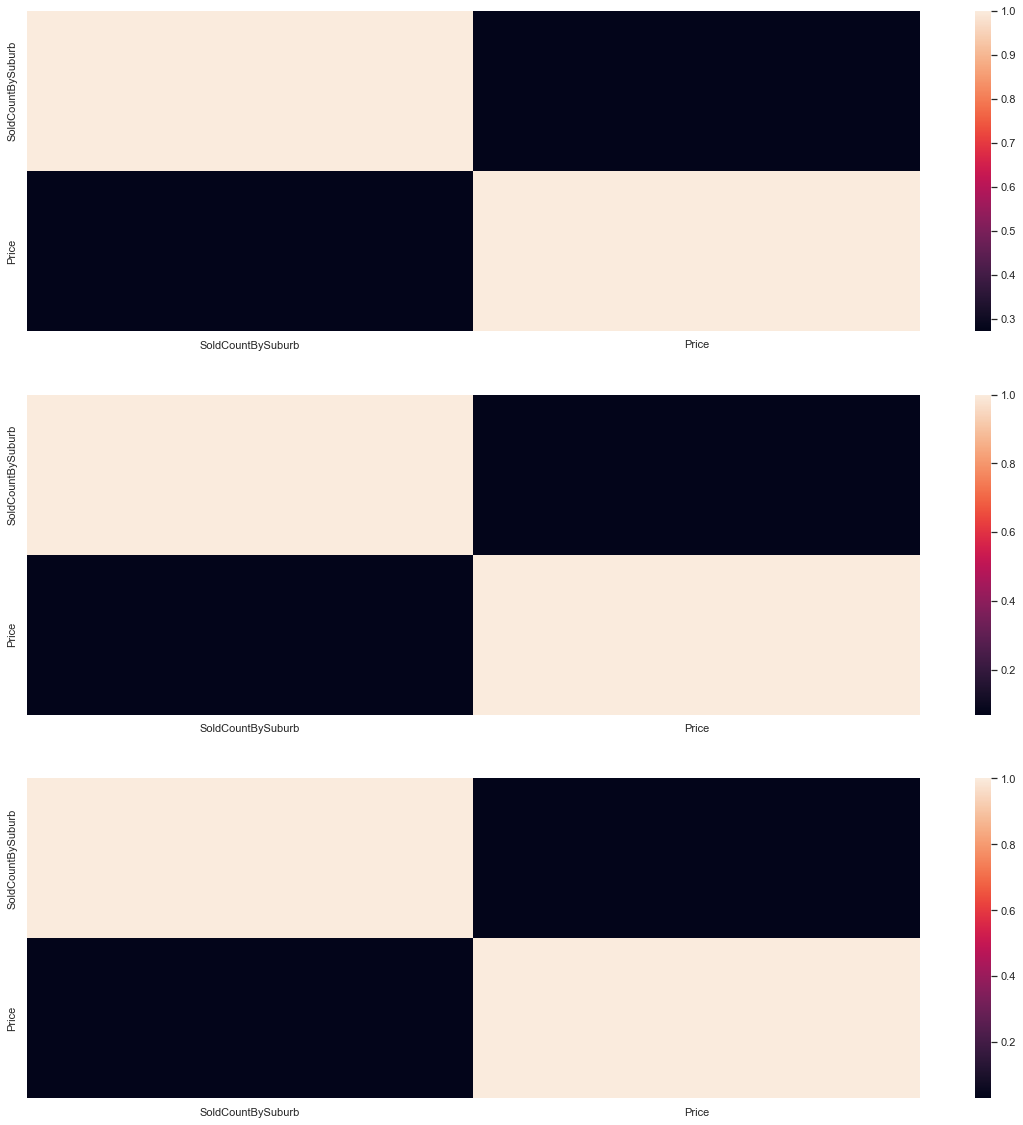

In [95]:
# Number of Property Sold Sum by Suburb & Median Price Corr
fig,ax = plt.subplots(figsize=(20,20))
plt.subplot(3,1,1)
PSdhouseCorr = pd.DataFrame.corr(PSd[PSd['Type']=='h'])
sns.heatmap(PSdhouseCorr)
plt.subplot(3,1,2)
PSdtownhouseCorr = pd.DataFrame.corr(PSd[PSd['Type']=='t'])
sns.heatmap(PSdtownhouseCorr)
plt.subplot(3,1,3)
PSdunitCorr = pd.DataFrame.corr(PSd[PSd['Type']=='u'])
sns.heatmap(PSdunitCorr)
plt.show()

## Output : Property sold number doest not impact the house price

## Pay a closer look into the suburbs which the sold number is above the mean

Mean of house sold number in different suburbs 30.18849840255591


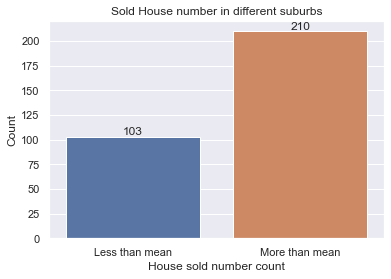

In [103]:
HouseSoldMean = PSd[PSd['Type']=='h']['SoldCountBySuburb'].mean()
print('Mean of house sold number in different suburbs',HouseSoldMean)
less_property = PSd[(PSd['Type']=='h')&(PSd['SoldCountBySuburb']>=HouseSoldMean)].shape[0]
more_property = PSd[(PSd['Type']=='h')&(PSd['SoldCountBySuburb']<=HouseSoldMean)].shape[0]
procount = pd.DataFrame({'Property':['Less than mean','More than mean'],'Count':[less_property,more_property]})
ax = sns.barplot(y=procount["Count"],x=procount["Property"])
plt.title('Sold House number in different suburbs')
plt.xlabel('House sold number count')
plt.ylabel('Count')
# show the number on bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()


## Output:The suburb impact the price in different type of property

## Dig in :How room number impact the price in top 5 sold house suburbs ?

In [111]:
##
TopSub = PSd['Suburb'].tolist()[:5]
# HouseSubList = HouseSub['Suburb'].tolist()
HouseNewdf = df[(df['Type']=='h')&(df['Suburb'].isin(TopSub))]
HouseNewdfGb = HouseNewdf.groupby(['Suburb','Rooms']).Price.agg('median').to_frame().reset_index()
HouseNewdfGb

,Suburb,Rooms,Price
0,Bentleigh East,2,1010000.00
1,Bentleigh East,3,1127500.00
2,Bentleigh East,4,1320000.00
3,Bentleigh East,5,1475000.00
4,Brunswick,1,786000.00
5,Brunswick,2,877500.00
6,Brunswick,3,1160000.00
7,Brunswick,4,1500000.00
8,Brunswick,5,1947500.00
9,Preston,1,830000.00


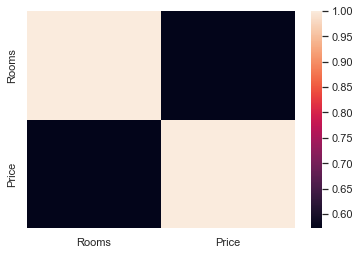

In [110]:
## 这个图结果好像不对？
HouseNewdfCorr = pd.DataFrame.corr(HouseNewdfGb)
sns.heatmap(HouseNewdfCorr)
plt.show()

# Will Sold Date impact house price ?

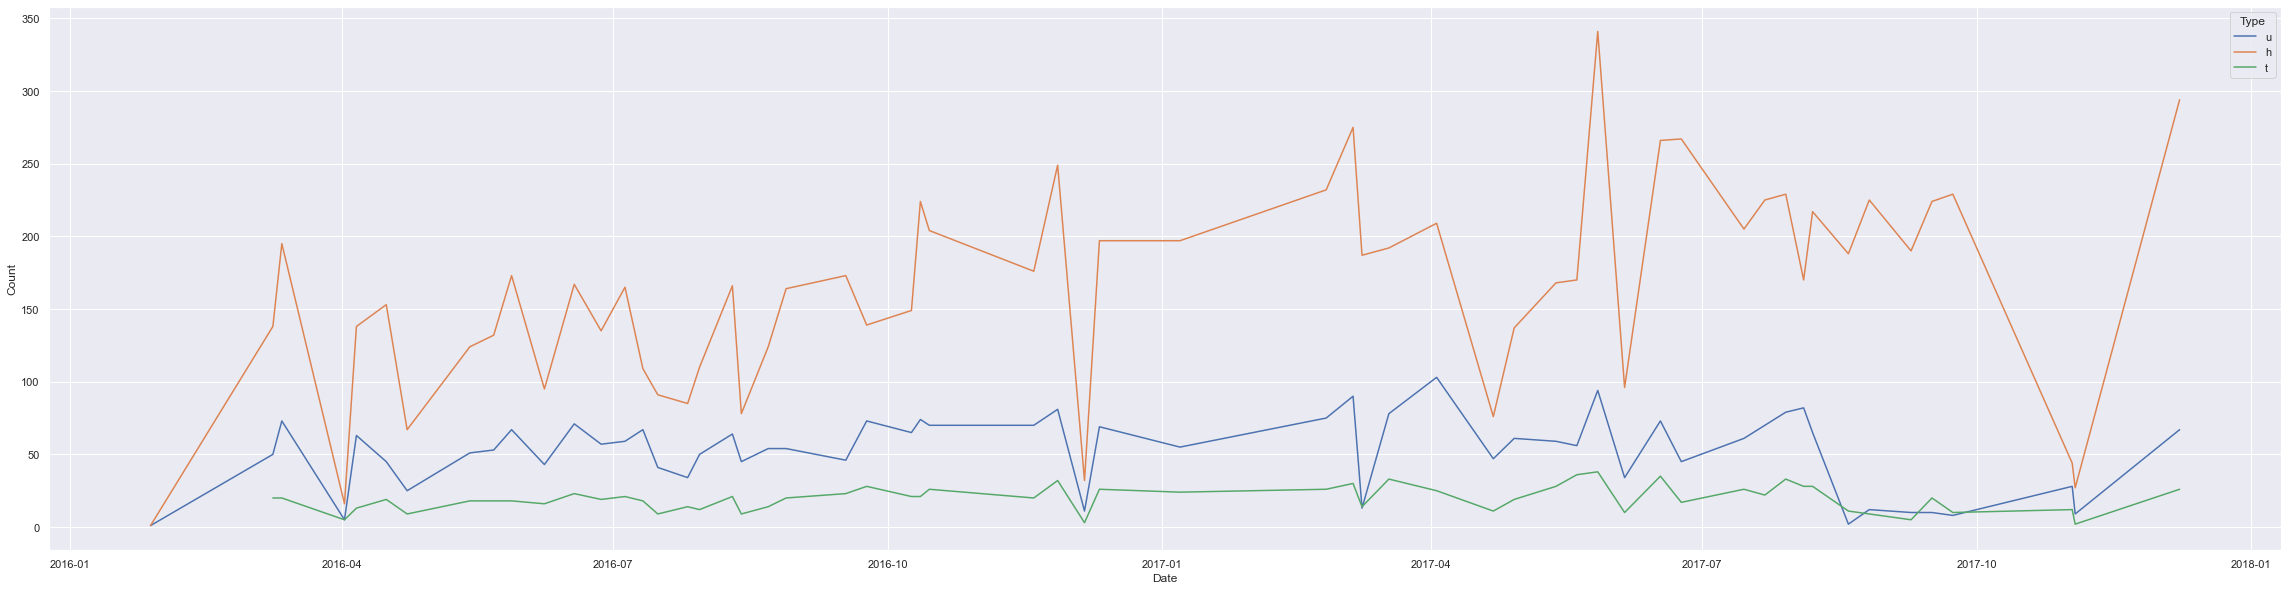

In [19]:
# Sold date with Price
fig,ax = plt.subplots(figsize=(40,10))
SoldTime = df.groupby('Date')['Type'].value_counts().rename('Count').to_frame().reset_index()
SoldTime['Date']=pd.to_datetime(SoldTime["Date"])
SoldTime =SoldTime.sort_values(by='Date')
sns.lineplot(x=SoldTime.Date,y=SoldTime.Count,hue=SoldTime.Type)
plt.show()

## Output : Sold Date may predict the trend of house price , feature house price can be predicted by the past sold date

5. Will Sale method imapct the price ? 
S - property sold
SP - property sold prior
PI - property passed in
VB - vendor bid
SA - sold after auction

In [20]:
## 叠加柱状图画失败
# # Discover the property average price regarding different Method
# Method = df.groupby(['Type','Method']).Price.agg('median')
# Method = Method.reset_index()
#
# plt.bar(x=Method.Method.unique().tolist(), y=Method[Method['Type']=='h']['Price'].tolist(), align="center",label='h',height=[[0,5],[5,10],[10,15]])
# plt.bar(x=Method.Method.unique().tolist(),y=Method[Method['Type']=='t']['Price'].tolist(),bottom=Method[Method['Type']=='h']['Price'],label='t',align='center')
# plt.bar(x=Method.Method.unique().tolist(),y=Method[Method['Type']=='u']['Price'].tolist(),bottom=Method[Method['Type']=='t']['Price'],label='u',align='center')
# plt.show()

In [21]:
# Vendor bid properties is the most expensive ones and property sold prior is the cheapest ones

6.Will location (Suburb) impact the real estate price?
  -Analysis based on different type of properties.



House price varies by the suburbs. Suburb is an important feature.

In [22]:
7. Will the size of real estate impact the prize?


Object `prize` not found.


In [23]:
# # Discover the property price regarding the size
# df['RoomNumbers'] = df['Bathroom'] + df['Bedroom2']
#
# import plotly.express as px
# fig = px.scatter_3d(df, x='RoomNumbers', y='Car', z='Price',width=600,
#                         height=800,color = 'Type',
#                    )
# fig.show()




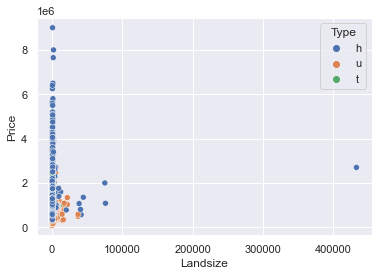

In [24]:
# how land size impact the prize
sns.scatterplot(data=df, x='Landsize', y='Price', hue='Type')
plt.show()

In [25]:
# check detail of the impact of
Pivot = pd.pivot_table(df,values='Price',index=['Type','Bathroom','Bedroom2','Car'],aggfunc={'Price':[min,max,np.median]})
# Sort value by the max price
Pivot = Pivot.reindex(Pivot.sort_values(by='median', ascending=False).index)

Pivot

max     median        min
Type Bathroom Bedroom2 Car                                  
h    6.00     6.00     3.00 6500000.00 6500000.00 6500000.00
     4.00     4.00     5.00 5500000.00 5500000.00 5500000.00
              6.00     7.00 4000000.00 4000000.00 4000000.00
     7.00     5.00     6.00 3900000.00 3900000.00 3900000.00
     4.00     4.00     8.00 3850000.00 3850000.00 3850000.00
...                                ...        ...        ...
u    1.00     1.00     2.00  680000.00  429500.00  350000.00
                       3.00  420000.00  420000.00  420000.00
     2.00     3.00     4.00  394000.00  394000.00  394000.00
     1.00     1.00     1.00 1210000.00  380000.00  185000.00
                       0.00  595000.00  366500.00   85000.00

[245 rows x 3 columns]

Text(0, 0.5, 'Price')

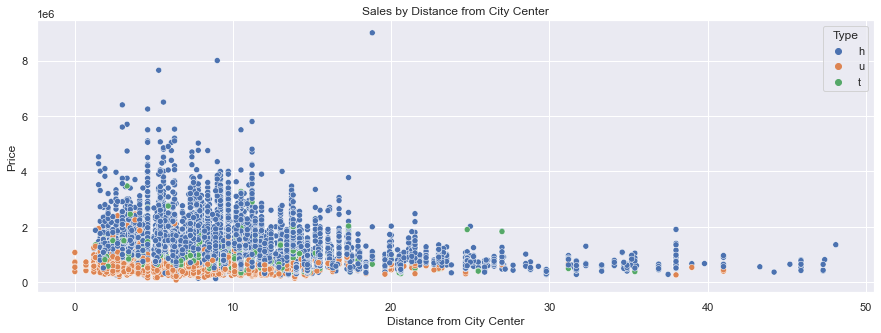

In [26]:
# distance from the city center
plt.figure(figsize=(15,5))
sns.scatterplot(x=df["Distance"],y=df["Price"],hue=df.Type);
plt.title("Sales by Distance from City Center")
plt.xlabel("Distance from City Center")
plt.ylabel("Price")

In [27]:
# import folium
#
# # Create map and display it
# for i,j in zip(df['Lattitude'], df['Longtitude']):
#     Melb_map = folium.Map(location=[i,j], zoom_start=12)
#
# AddPrice= folium.map.FeatureGroup()
# # add pop-up text to each marker on the map
# latitudes = list(df.Lattitude)
# longitudes = list(df.Longtitude)
# labels = list(df.Type)
#
# for lat, lng, label in zip(latitudes, longitudes, labels):
#     folium.Marker([lat, lng], popup=label).add_to(Melb_map)
#
# # add incidents to map
# Melb_map.add_child(AddPrice)
#
# # Display the map of Melb
# Melb_map

In [28]:
# from folium.plugins import HeatMap
# # Creat heat map for  real estate
# # Convert data format
# heatdata = df[['Lattitude','Longtitude']].values.tolist()
#
# # add incidents to map
# HeatMap(heatdata).add_to(Melb_map)
#
# Melb_map